# Atmospheric Retrievals with POSEIDON - Editing Plots and Tables

Now that you've run the retrieval for WASP-999b, lets make some fancy plots and print out the results to plop into a paper

The first few cells are copied from retrieval_basic.

In [2]:
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J

#***** Define stellar properties *****#

R_s = 1.155*R_Sun     # Stellar radius (m)
T_s = 6071.0          # Stellar effective temperature (K)
Met_s = 0.0           # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.38        # Stellar log surface gravity (log10(cm/s^2) by convention)

# Create the stellar object
star = create_star(R_s, T_s, log_g_s, Met_s)

#***** Define planet properties *****#

planet_name = 'WASP-999b'  # Planet name used for plots, output files etc.

R_p = 1.359*R_J     # Planetary radius (m)
g_p = 9.186         # Gravitational field of planet (m/s^2)
T_eq = 1400.0       # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, gravity = g_p, T_eq = T_eq)

/Users/elijahmullens/Desktop/POSEIDON-V1-1/POSEIDON/absorption.py:1493: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def store_Rayleigh_eta_LBL(wl_model, chemical_species):


Next, you plot your observed transmission spectrum of WASP-999b.

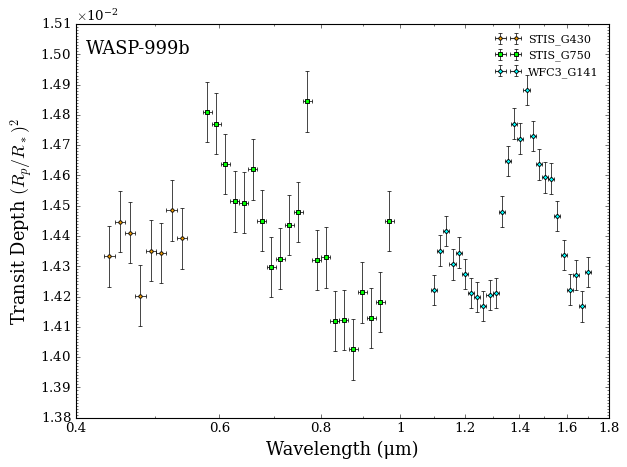

In [3]:
from POSEIDON.core import load_data, wl_grid_constant_R
from POSEIDON.visuals import plot_data

#***** Model wavelength grid *****#

wl_min = 0.4      # Minimum wavelength (um)
wl_max = 1.8      # Maximum wavelength (um)
R = 4000          # Spectral resolution of grid      

# We need to provide a model wavelength grid to initialise instrument properties
wl = wl_grid_constant_R(wl_min, wl_max, R)

# Specify the STIS and WFC3 Hubble data
data_dir = '../../../../POSEIDON/reference_data/observations/WASP-999b'             
datasets = ['WASP-999b_STIS_G430.dat', 
            'WASP-999b_STIS_G750.dat', 
            'WASP-999b_WFC3_G141.dat']  
instruments = ['STIS_G430', 'STIS_G750', 'WFC3_G141']

# Load dataset, pre-load instrument PSF and transmission function
data = load_data(data_dir, datasets, instruments, wl)

# Plot our data
fig_data = plot_data(data, planet_name)

In [4]:
from POSEIDON.core import define_model

#***** Define model *****#

model_name_1 = 'My_first_retrieval'  # Model name used for plots, output files etc.

bulk_species = ['H2', 'He']     # H2 + He comprises the bulk atmosphere
param_species = ['H2O']         # The only trace gas is H2O

# Create the model object
model_1 = define_model(model_name_1, bulk_species, param_species, 
                     PT_profile = 'isotherm', cloud_model = 'cloud-free')

# Check the free parameters defining this model
print("Free parameters: " + str(model_1['param_names']))

#***** Define model *****#

model_name_2 = 'Improved_retrieval'

bulk_species = ['H2', 'He']     
param_species_2 = ['Na', 'K', 'TiO', 'H2O']  # Three new chemical species added

# Create the model object
model_2 = define_model(model_name_2, bulk_species, param_species_2, 
                       PT_profile = 'isotherm', cloud_model = 'cloud-free')

# Check the free parameters defining this model
print("Free parameters: " + str(model_2['param_names']))

Free parameters: ['R_p_ref' 'T' 'log_H2O']
Free parameters: ['R_p_ref' 'T' 'log_Na' 'log_K' 'log_TiO' 'log_H2O']


# Fancy plots

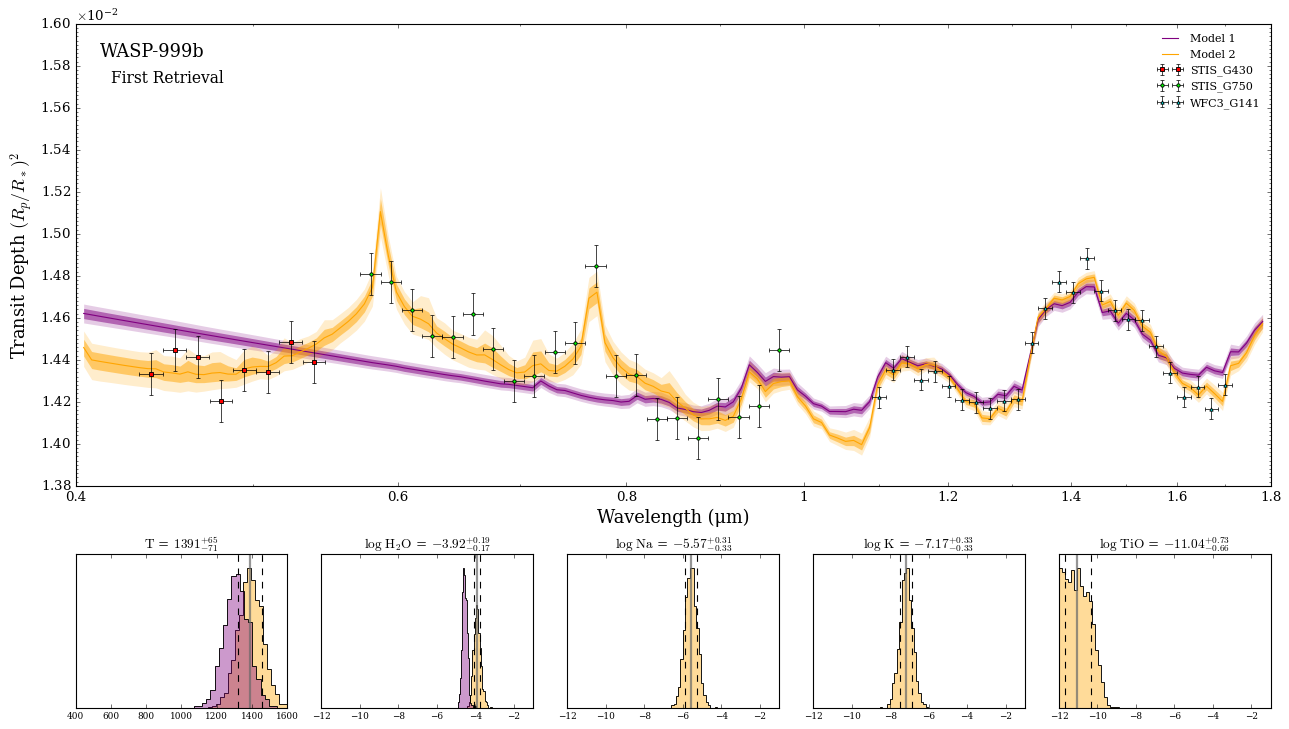

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [5]:
from POSEIDON.visuals import plot_spectra_retrieved
from POSEIDON.utility import read_retrieved_spectrum, plot_collection

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_1)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_2)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = spectra_median)
spectra_low1 = plot_collection(spec_low1, wl, collection = spectra_low1) 
spectra_low2 = plot_collection(spec_low2, wl, collection = spectra_low2) 
spectra_high1 = plot_collection(spec_high1, wl, collection = spectra_high1) 
spectra_high2 = plot_collection(spec_high2, wl, collection = spectra_high2)

#***** Plotting magic *****#

import matplotlib.pyplot as plt
from POSEIDON.visuals import plot_histograms

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9))  

# This function is the magic. Each letter corresponds to one matplotlib axis, which you can then pass to POSEIDON's plotting functions
axd = fig_combined.subplot_mosaic(
    """
    AAAAA
    AAAAA
    AAAAA
    abcde
    """
)

# Plot the spectra in A
ax_spectrum = axd["A"]

model_1_color = 'purple'
model_2_color = 'orange'


# Produce figure

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'First Retrieval',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime','cyan'],
                        data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 2,
                        data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        )

# Plot the histograms on a,b,c,d,e

# Shared parameteres in a and b 
# When using more than one model, use retrieval_colour_list 
# Also, the span is usually whatever the prior range was 
# Note that the first model in models is what the posterior values are shown for

axes_histograms = [axd['a'],axd["b"]]

models = [model_2, model_1]

_ = plot_histograms(planet_name, models, plot_parameters = ['T','log_H2O'], 
                    span = ((400,1600), (-12,-1)),
                    N_bins = [20,20],
                    retrieval_colour_list = [model_2_color, model_1_color],
                    axes = axes_histograms, save_fig = False)

# Non-shared parameteres in the rest 
# When using one model, use parameter_colour_list 

axes_histograms = [axd['c'],axd["d"],axd['e']]

models = [model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['log_Na','log_K','log_TiO'], 
                    span = ((-12,-1),(-12,-1),(-12,-1)),
                    N_bins = [20,20,20],
                    parameter_colour_list = [model_2_color,model_2_color,model_2_color],
                    axes = axes_histograms, save_fig = False)

# To save the plot, use 
# fig_combined.savefig('name.pdf or name.png', bbox_inches='tight', dpi=800)

# Advanced Plotting

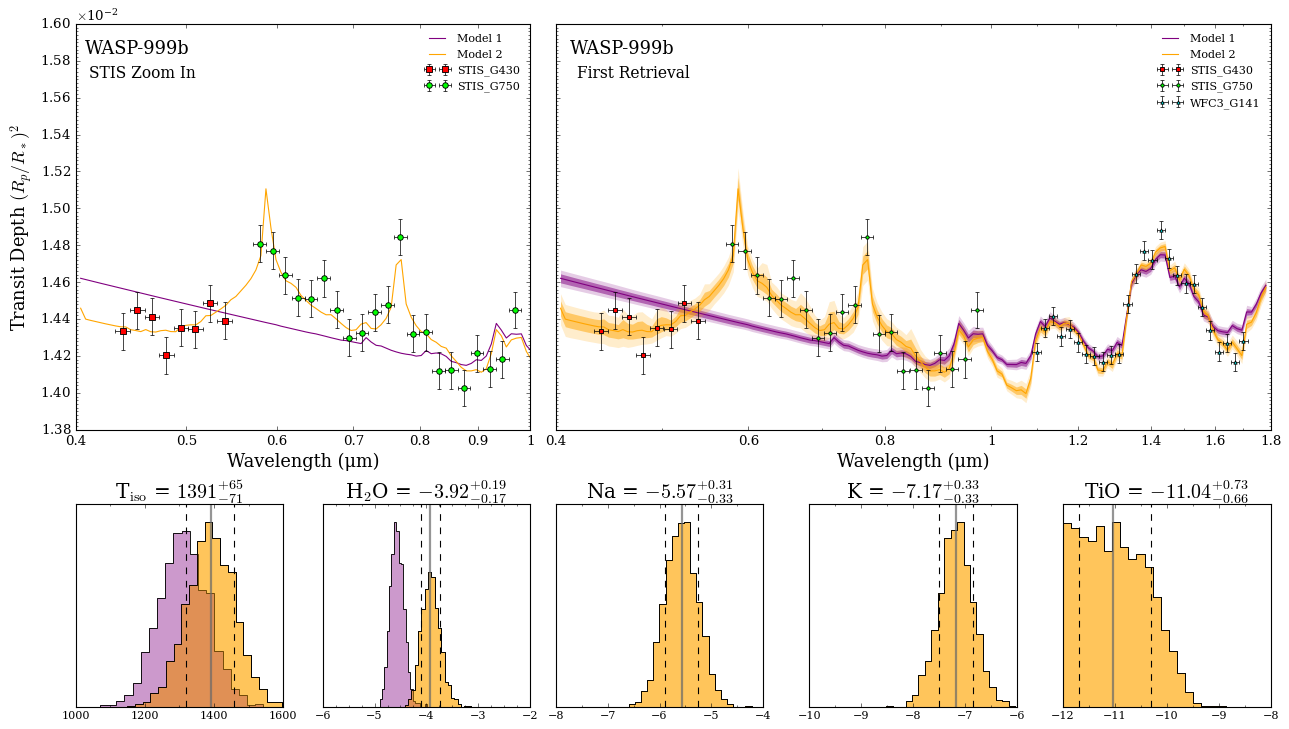

<Figure size 853.36x480 with 0 Axes>

<Figure size 853.36x480 with 0 Axes>

<Figure size 600x200 with 0 Axes>

<Figure size 600x200 with 0 Axes>

In [6]:
from POSEIDON.visuals import plot_spectra_retrieved
from POSEIDON.utility import read_retrieved_spectrum, plot_collection

# Read retrieved spectrum confidence regions
wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_1)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = [])
spectra_low1 = plot_collection(spec_low1, wl, collection = []) 
spectra_low2 = plot_collection(spec_low2, wl, collection = []) 
spectra_high1 = plot_collection(spec_high1, wl, collection = []) 
spectra_high2 = plot_collection(spec_high2, wl, collection = [])

wl, spec_low2, spec_low1, spec_median, \
spec_high1, spec_high2 = read_retrieved_spectrum(planet_name, model_name_2)

# Plot
# Create composite spectra objects for plotting
spectra_median = plot_collection(spec_median, wl, collection = spectra_median)
spectra_low1 = plot_collection(spec_low1, wl, collection = spectra_low1) 
spectra_low2 = plot_collection(spec_low2, wl, collection = spectra_low2) 
spectra_high1 = plot_collection(spec_high1, wl, collection = spectra_high1) 
spectra_high2 = plot_collection(spec_high2, wl, collection = spectra_high2)

#***** Plotting magic *****#

import matplotlib.pyplot as plt
from POSEIDON.visuals import plot_histograms

fig_combined = plt.figure(constrained_layout=True, figsize=(16, 9))  

# This function is the magic. Each letter corresponds to one matplotlib axis, which you can then pass to POSEIDON's plotting functions
axd = fig_combined.subplot_mosaic(
    """
    BBAAA
    BBAAA
    abcde
    """
)

# Plot the spectra in A
ax_spectrum = axd["A"]

model_1_color = 'purple'
model_2_color = 'orange'


# Produce figure with full wavelength range

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'First Retrieval',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime','cyan'],
                        data_marker_list = ['s','o','^'], data_marker_size_list = [3,3,3],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 2,
                        data_labels = ['STIS_G430', 'STIS_G750', 'WFC3_G141'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        ylabels = False
                        )

# Create a zoom in on STIS

# Specify the STIS data
data_dir = '../../../../POSEIDON/reference_data/observations/WASP-999b'             
datasets = ['WASP-999b_STIS_G430.dat','WASP-999b_STIS_G750.dat']  
instruments = ['STIS_G430', 'STIS_G750']

# Load dataset, pre-load instrument PSF and transmission function
data_stis = load_data(data_dir, datasets, instruments, wl)

ax_spectrum = axd["B"]

_ = plot_spectra_retrieved(spectra_median, spectra_low2, spectra_low1, 
                        spectra_high1, spectra_high2, planet_name,
                        data_stis, R_to_bin = 100, show_ymodel = False,
                        colour_list = [model_1_color, model_2_color], 
                        plt_label = 'STIS Zoom In',
                        spectra_labels = ['Model 1', 'Model 2'],
                        data_colour_list = ['red', 'lime'],
                        data_marker_list = ['s','o'], data_marker_size_list = [5,5],
                        figure_shape = 'wide', save_fig = False,
                        ax = ax_spectrum,
                        sigma_to_plot = 0,
                        data_labels = ['STIS_G430', 'STIS_G750'],
                        y_unit = 'transit_depth',
                        legend_location = 'upper right',
                        wl_min = 0.4, wl_max = 1
                        )

# Plot the histograms on a,b,c,d,e

# Shared parameteres in a and b 
# When using more than one model, use retrieval_colour_list 
# Pro tip, the parameters are plotted in order, so if you want one on top of the others, put it last in the list
# We also show tick_labelsize, tick_fontsize, and custom_labels
# Custom ticks is a list of [[MajorTick, MinorTick]] for each parameter

axes_histograms = [axd['a'],axd["b"]]

models = [model_2, model_1, model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['T','log_H2O'], 
                    span = ((1000,1600), (-6,-2)),
                    N_bins = [20,20],
                    retrieval_colour_list = [model_2_color, model_1_color, model_2_color],
                    axes = axes_histograms, save_fig = False,
                    tick_labelsize = 10, title_fontsize = 18,
                    custom_labels = ['T$_{\mathrm{iso}}$', 'H$_2$O'],
                    custom_ticks = [[200,100], [1,0.25]])

# Non-shared parameteres in the rest 
# When using one model, use parameter_colour_list 

axes_histograms = [axd['c'],axd["d"],axd['e']]

# Plotted twice to have consistent color
models = [model_2,model_2]

_ = plot_histograms(planet_name, models, plot_parameters = ['log_Na','log_K','log_TiO'], 
                    span = ((-8,-4),(-10,-6),(-12,-8)),
                    N_bins = [20,20,20],
                    retrieval_colour_list = [model_2_color,model_2_color],
                    axes = axes_histograms, save_fig = False,
                    tick_labelsize = 10, title_fontsize = 18,
                    custom_labels = ['Na', 'K', 'TiO'],
                    custom_ticks = [[1,0.5],[1,0.5],[1,0.5]])

# To save the plot, use 
# fig_combined.savefig('name.pdf or name.png', bbox_inches='tight', dpi=800)

# Make latex table

In [7]:
from POSEIDON.utility import make_latex_table_from_results

models = [model_name_1, model_name_2]
params = ['T','log_H2O', 'log_Na', 'log_K', 'log_TiO']

make_latex_table_from_results(models, params, planet_name)

T &  $1311.6^{+72.5}_{-68.5}$ &  $1390.8^{+65.6}_{-69.5}$ \\
log_H2O &  $-4.6^{+0.1}_{-0.1}$ &  $-3.9^{+0.2}_{-0.2}$ \\
log_Na &  --- & $-5.6^{+0.3}_{-0.3}$ \\
log_K &  --- & $-7.2^{+0.3}_{-0.3}$ \\
log_TiO &  --- & $-11.0^{+0.7}_{-0.7}$ \\
